In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Objective

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the
given dataset

# Attribute Information:

• cap-shape   : bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
• cap-surface : fibrous=f, grooves=g, scaly=y, smooth=s 
• cap-colour  : brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,red=e, white=w, yellow=y 
• bruises     : bruises=t, no=f 
• odour       : almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
• gill-attachment: attached=a, descending=d, free=f, notched=n 
• gill-spacing   : close=c, crowded=w, distant=d 
• gill-size      : broad=b, narrow=n 
• gill-colour    : black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o,pink=p, purple=u, red=e, white=w, yellow=y 
• stalk-shape    : enlarging=e, tapering=t 
• Stalk-root     : bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r,missing=? 
• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
• stalk-colour-above-ring : brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y 
• stalk-colour-below-ring : brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y 
• veil-type    : partial=p, universal=u 
• veil-colour  : brown=n, orange=o, white=w, yellow=y 
• ring-number  : none=n, one=o, two=t 
• ring-type    : cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,sheathing=s, zone=z 
• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,purple=u, white=w, yellow=y 
• population        : abundant=a, clustered=c, numerous=n, scattered=s, several=v,solitary=y 
• habitat           : grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,woods=d

# Read the dataset

In [2]:
data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [4]:
#no .of rows and columns
data.shape

(8124, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#checking the nullvalues
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# EDA

C:\Users\RASHEED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

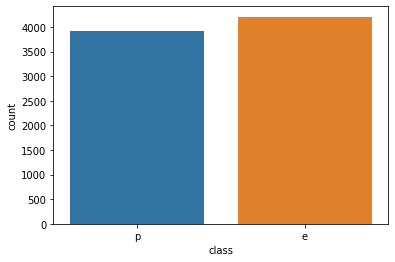

In [8]:
sns.countplot(data['class'])

> From the Bargraph of the feature 'class' the number of edible mushroom is higher than Poisonous mushroom .
> The number of edible mushroom is more than 4000 where as the number of Poisonous mushrooms are below 4000.

<Figure size 1008x432 with 0 Axes>

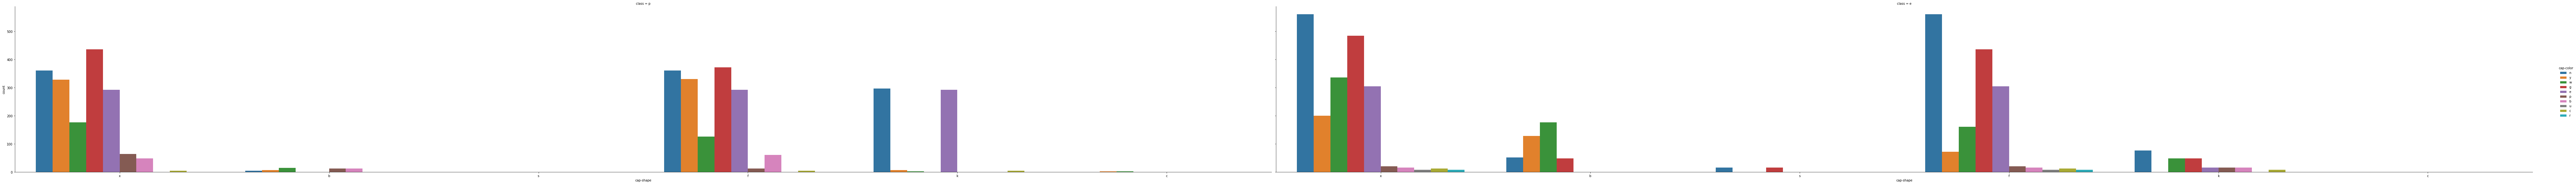

In [9]:
plt.figure(figsize=(14,6))
q=sns.catplot(x='cap-shape',hue='cap-color',col='class',data=data,kind='count',height=8,aspect=7);


Observation:
> The first graph is about Poisonous mushroom and the second plot is about edible mushroom .
> While comparing the mushrooms with convex shape cap(x), n(ie,cap with brown colour) is more in edible mushroom than the         poisonous.
> Mushroom having bell shaped cap with white cap colour is more in edible mushroom graph which is low in poisonous mushroom       graph
> While comparing Knobbed (k) cap shape mushroom in both the graph,the red coloured cap is not recommended for eating 
  because it is high in the first graph of poisonous.

<Figure size 1008x432 with 0 Axes>

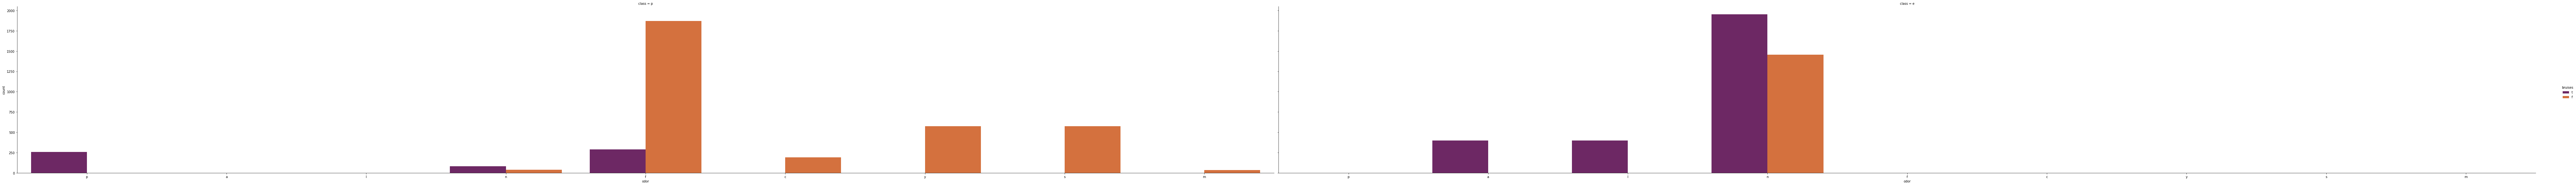

In [10]:
plt.figure(figsize=(14,6))
e=sns.catplot(x='odor',hue='bruises',col='class',data=data,kind='count',height=8,aspect=7,palette='inferno');

> Odourless and Bruised Mushrooms are highly recommended for eating.
> Fishy odour with no bruises mushroom are poisonous.

# Data Pre-processing

In [11]:
#Label encoding the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=data.apply(LabelEncoder().fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


> 1 is for P and 0 is for e in the column class

In [12]:
#split the dataset
x=df.drop(['class'],axis=1)
y=df['class']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Decision Tree Model

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
dt.score(x_train,y_train)

1.0

In [16]:
prediction=dt.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,prediction)

1.0

In [18]:
confusion_matrix(y_test,prediction)

array([[1257,    0],
       [   0, 1181]], dtype=int64)

> Decision Tree model gives 100% accuracy and the confusion matrix is not showing any mismatch.

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [20]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

1.0

In [21]:
predictions=rf.predict(x_test)
rf.score(x_test,y_test)

1.0

In [22]:
accuracy_score(y_test,predictions)

1.0

In [23]:
#confusion matrix
confusion_matrix(y_test,predictions)

array([[1257,    0],
       [   0, 1181]], dtype=int64)

> Random forest also gives 100% accuracy and the mismatch is zero while checking the confusion matrix.

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\RASHEED\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('f1 score is:',f1_score(y_test,y_pred))

Accuracy is: 0.9499589827727646
Precision is: 0.9514066496163683
f1 score is: 0.9481733220050976


In [26]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[1200,   57],
       [  65, 1116]], dtype=int64)

> The accuracy obtained by using Logistic regression is 94.99% and it has 122 mismatch in confusion matrix.

# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [28]:
acc_values

[0.9963084495488105,
 0.9967186218211649,
 0.9958982772764561,
 0.9954881050041017,
 0.9950779327317474,
 0.9942575881870386,
 0.9942575881870386,
 0.9930270713699754,
 0.9934372436423298,
 0.9934372436423298,
 0.9930270713699754,
 0.9934372436423298]

Text(0, 0.5, 'Accuracy')

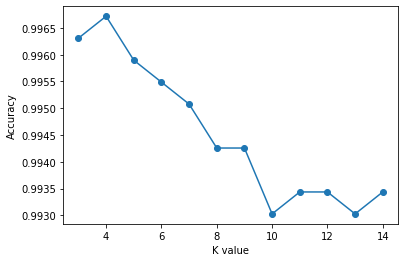

In [29]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')

> Here high accuracy is at k=4 so we can make a model with k=4

In [30]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [31]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('f1 score is:',f1_score(y_test,y_pred))

Accuracy is: 0.9967186218211649
Precision is: 0.9957734573119188
f1 score is: 0.9966159052453468


In [32]:
#Let's check this model with confusion matrix
confusion_matrix(y_test,y_pred)

array([[1252,    5],
       [   3, 1178]], dtype=int64)

> The accuracy given by KNN model is 99.67% and it has 8 misclassification in the confusion matrix.

# SVM

In [33]:
#Linear classifier
from sklearn.svm import SVC

In [34]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print('Accuracy using linear SVM is:',accuracy_score(y_test,y_pred))

Accuracy using linear SVM is: 0.961033634126333


In [35]:
#polynomial SVM
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)
print('Accuracy using linear SVM is:',accuracy_score(y_test,y_pred))

Accuracy using linear SVM is: 0.9995898277276456


> The SVM gives high accuracy ie, 99.95% while using poly kernal.

# Naïve Bayes’ Classifier

In [36]:
#fitting gaussian naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9294503691550451


In [37]:
#Let's check this model with confusion matrix
confusion_matrix(y_test,y_pred)

array([[1172,   85],
       [  87, 1094]], dtype=int64)

In [38]:
#fitting bernoulli naive bayes to the training set
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.8461853978671042


In [39]:
confusion_matrix(y_test,y_pred)

array([[1193,   64],
       [ 311,  870]], dtype=int64)

> The Gaussian Naive Bayes classifier gives high accuracy while comparing with Bernoulli Naive Bayes classifier ie,92.94% 
  and it has 172 misclassification in confusion matrix.

INSIGHT:
> The Decision tree and Random forest model gives high accuracy than the other model so it is better to use either of the model   to predict whether the mushroom is edible or poisonous. 